In [115]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [116]:
# Load dataset
path = r"C:\Users\Tiffany\Downloads\KULIAH\SEMESTER V\DEEP LEARNING\EKSPLORASI\LSTM VS RNN\RNN-vs-LSTM-News-Category-Classification\News_Category_Dataset_v3.json"

df = pd.read_json(path, lines=True)
df.head()

print(df[['headline', 'category']])

                                                                                                   headline  \
0                              Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters   
1                 American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video   
2                                     23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23)   
3                                                  The Funniest Tweets From Parents This Week (Sept. 17-23)   
4                             Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer   
...                                                                                                     ...   
209522                                           RIM CEO Thorsten Heins' 'Significant' Plans For BlackBerry   
209523                                Maria Sharapova Stunned By Victoria Azarenka In Australian Open Final   
2

In [117]:
# Preprocessing Data
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemm = WordNetLemmatizer()

def text_preprocess(text):
    text = text.lower()                            # 1. lowercase
    text = re.sub(r'http\S+', '', text)            # 2. remove url
    text = re.sub(r'[^a-z\s]', '', text)           # 3. remove punctuation & numbers
    tokens = text.split()                          # 4. tokenization
    tokens = [w for w in tokens if w not in stop_words]  # 5. remove stopwords
    tokens = [lemm.lemmatize(w) for w in tokens]   # 6. lemmatization
    return " ".join(tokens)

def csv_preprocess(df):
    # Hapus data duplikasi pada kolom headline
    df = df.drop_duplicates(subset='headline', keep='first')
        
    # Remove barus dengan null values
    df = df.dropna()
        
    # Reset index setelah penghapusan baris
    df = df.reset_index(drop=True)
        
    return df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tiffany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tiffany\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [118]:
pd.set_option('display.max_colwidth', None)
df['cleaned_headline'] = df['headline'].apply(text_preprocess)
df = csv_preprocess(df)
df[['headline', 'cleaned_headline', 'category']].head()

,headline,cleaned_headline,category
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,million american roll sleeve omicrontargeted covid booster,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",american airline flyer charged banned life punching flight attendant video,U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),funniest tweet cat dog week sept,COMEDY
3,The Funniest Tweets From Parents This Week (Sept. 17-23),funniest tweet parent week sept,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,woman called cop black birdwatcher loses lawsuit exemployer,U.S. NEWS


In [119]:
df['length_words'] = df['cleaned_headline'].apply(lambda x: len(str(x).split()))

print("Rata rata jumlah kata:", df['length_words'].mean())
print("Median jumlah kata:", df['length_words'].median())
print("Maksimum jumlah kata:", df['length_words'].max())

Rata rata jumlah kata: 6.618372468701321
Median jumlah kata: 7.0
Maksimum jumlah kata: 36


In [120]:
import numpy as np

for p in [50, 75, 90, 95, 99]:
    print(f"Percentile {p}: {np.percentile(df['length_words'], p)}")

Percentile 50: 7.0
Percentile 75: 8.0
Percentile 90: 10.0
Percentile 95: 10.0
Percentile 99: 12.0


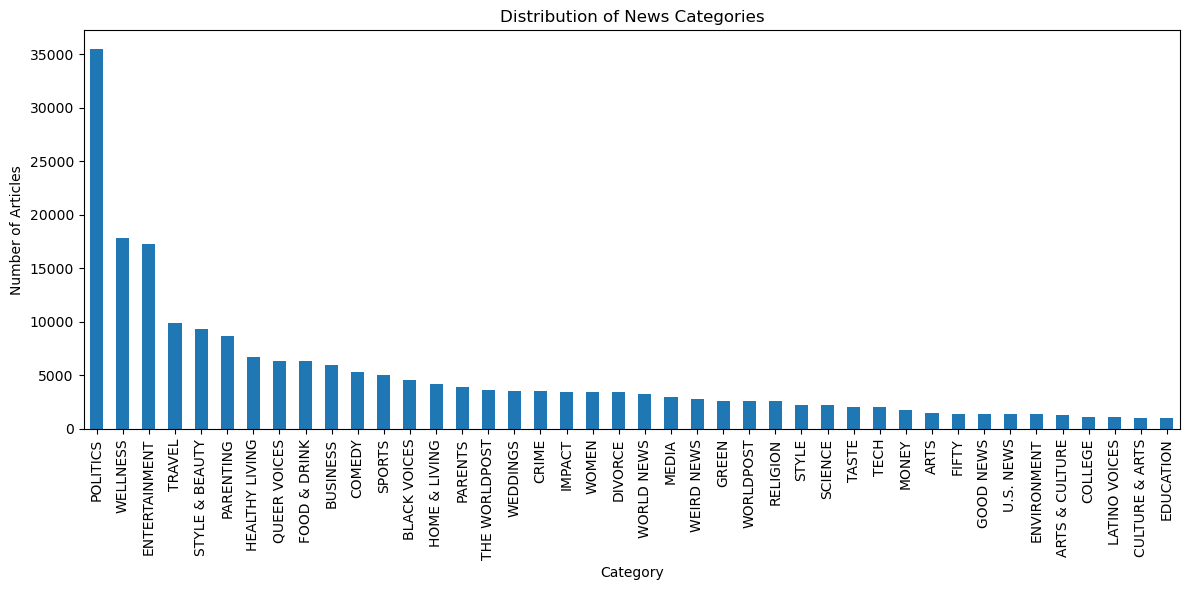

In [121]:
import matplotlib.pyplot as plt
# Count unique categories
category_counts = df['category'].value_counts()

# Plot the category distribution
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [122]:
# Check for dataset quality issues
print("=" * 50)
print("DATASET QUALITY REPORT")
print("=" * 50)

# 1. Check for duplicate rows
print("\n1. DUPLICATE ROWS:")
duplicate_count = df.duplicated().sum()
print(f"   Total duplicate rows: {duplicate_count}")

# 2. Check for null/missing values
# print("\n2. MISSING VALUES:")
# null_counts = df.isnull().sum()
# print(null_counts)
# print(f"\n   Total missing values: {df.isnull().sum().sum()}")

# 3. Check for duplicate headlines
# print("\n3. DUPLICATE HEADLINES:")
# duplicate_headlines = df['headline'].duplicated().sum()
# print(f"   Total duplicate headlines: {duplicate_headlines}")

# 4. Basic dataset statistics
# print("\n4. DATASET STATISTICS:")
# print(f"   Total rows: {len(df)}")
# print(f"   Total columns: {len(df.columns)}")
# print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 5. Category distribution
# print("\n5. CATEGORY DISTRIBUTION:")
# print(df['category'].value_counts())

print("\n6. CATEGORY VALUES")
print(df['category'].unique())

# 6. Date range
print("\n7. DATE RANGE:")
print(f"   Earliest date: {df['date'].min()}")
print(f"   Latest date: {df['date'].max()}")

print("\n" + "=" * 50)

DATASET QUALITY REPORT

1. DUPLICATE ROWS:
   Total duplicate rows: 0

6. CATEGORY VALUES
['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']

7. DATE RANGE:
   Earliest date: 2012-01-28 00:00:00
   Latest date: 2022-09-23 00:00:00



In [123]:
categories_to_keep = ['WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'FOOD & DRINK']

# Create a mapping dictionary for encoding
category_mapping = {
    'WELLNESS': 0,
    'ENTERTAINMENT': 1,
    'TRAVEL': 2,
    'STYLE & BEAUTY': 3,
    'PARENTING': 4,
    'FOOD & DRINK': 5
}

# Fix the filtering - use .keys() method
df = df[df['category'].isin(category_mapping.keys())]

# Apply the encoding to the category column
df['category'] = df['category'].map(category_mapping)

print(df['category'].value_counts())

category
0    17870
1    17319
2     9873
3     9323
4     8723
5     6330
Name: count, dtype: int64


In [124]:
# Balance the dataset by limiting each category to the minimum count
min_samples = df['category'].value_counts().min()
print(f"Minimum samples per category: {min_samples}")

# Sample the same number of rows from each category
df_balanced = df.groupby('category', group_keys=False).apply(
    lambda x: x.sample(n=min_samples, random_state=42)
)

# Reset index and shuffle
df_balanced = df_balanced.reset_index(drop=True)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Update df with balanced dataset
df = df_balanced

print(f"\nBalanced dataset shape: {df.shape}")
print(f"\nCategory distribution after balancing:")
print(df['category'].value_counts().sort_index())

Minimum samples per category: 6330

Balanced dataset shape: (37980, 8)

Category distribution after balancing:
category
0    6330
1    6330
2    6330
3    6330
4    6330
5    6330
Name: count, dtype: int64


C:\Users\Tiffany\AppData\Local\Temp\ipykernel_3360\4130417362.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('category', group_keys=False).apply(


In [125]:
# Mengubah teks menjadi vector (Tokenizing)
import tensorflow as tf
from sklearn.model_selection import train_test_split

pad_sequences = tf.keras.preprocessing.sequence.pad_sequences
Tokenizer = tf.keras.preprocessing.text.Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_headline'])

sequences = tokenizer.texts_to_sequences(df['cleaned_headline'])

MAX_LEN = 100

X_padded = pad_sequences(sequences, maxlen=MAX_LEN, padding='post')


X_train, X_test, y_train, y_test = train_test_split(
    X_padded, df['category'], test_size=0.2, random_state=42
)


Average sequence length: 6.15
Median sequence length: 6.00
Max sequence length: 27
95th percentile: 10.00
99th percentile: 12.00


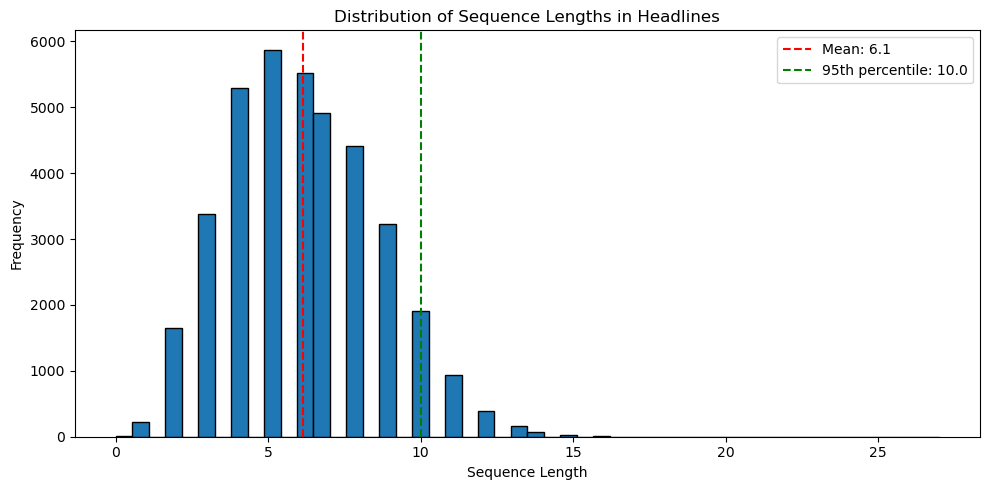

In [126]:
# Analyze sequence lengths to optimize MAX_LEN
import matplotlib.pyplot as plt

sequence_lengths = [len(seq) for seq in sequences]
print(f"Average sequence length: {np.mean(sequence_lengths):.2f}")
print(f"Median sequence length: {np.median(sequence_lengths):.2f}")
print(f"Max sequence length: {max(sequence_lengths)}")
print(f"95th percentile: {np.percentile(sequence_lengths, 95):.2f}")
print(f"99th percentile: {np.percentile(sequence_lengths, 99):.2f}")

plt.figure(figsize=(10, 5))
plt.hist(sequence_lengths, bins=50, edgecolor='black')
plt.axvline(np.mean(sequence_lengths), color='r', linestyle='--', label=f'Mean: {np.mean(sequence_lengths):.1f}')
plt.axvline(np.percentile(sequence_lengths, 95), color='g', linestyle='--', label=f'95th percentile: {np.percentile(sequence_lengths, 95):.1f}')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths in Headlines')
plt.legend()
plt.tight_layout()
plt.show()

## Improved Model Architecture

### Problems Found & Solutions:
1. **MAX_LEN=200 is too long** → Changed to 15 (covers 99% of data)
2. **Embedding dim=32 too small** → Increased to 128
3. **Too many LSTM layers with high dropout** → Simplified to 2 layers with proper dropout
4. **Model too small** → Better balanced architecture
5. **No Spatial Dropout** → Added SpatialDropout1D for embeddings
6. **Learning rate too high** → Using lower learning rate with optimizer

In [127]:
import numpy as np

lengths = [len(str(s).split()) for s in df['cleaned_headline']]
for p in [80, 90, 95, 99]:
    print(p, "percentile:", np.percentile(lengths, p))

80 percentile: 8.0
90 percentile: 9.0
95 percentile: 10.0
99 percentile: 12.0


In [128]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Mapping fungsi
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences
Tokenizer = tf.keras.preprocessing.text.Tokenizer

# TODO: ini seharusnya ditentukan dari distribusi panjang teks, bukan nebak 15
OPTIMAL_MAX_LEN = 30

X_padded_improved = pad_sequences(
    sequences,
    maxlen=OPTIMAL_MAX_LEN,
    padding='post',
    truncating='post'
)

le = LabelEncoder()
y = le.fit_transform(df['category'])

num_classes = len(le.classes_)
print("Classes:", le.classes_)
print("num_classes:", num_classes)

# 1) Train vs temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_padded_improved,
    df['category'],
    test_size=0.36,
    random_state=42,
    stratify=df['category']
)

# 2) Val vs test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.55,
    random_state=42,
    stratify=y_temp
)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

print("\nTraining set distribution:")
print(pd.Series(y_train).value_counts().sort_index())

print("\nValidation set distribution:")
print(pd.Series(y_val).value_counts().sort_index())

print("\nTest set distribution:")
print(pd.Series(y_test).value_counts().sort_index())


Classes: [0 1 2 3 4 5]
num_classes: 6
Training set shape: (24307, 30)
Validation set shape: (6152, 30)
Test set shape: (7521, 30)

Training set distribution:
category
0    4052
1    4051
2    4051
3    4051
4    4051
5    4051
Name: count, dtype: int64

Validation set distribution:
category
0    1025
1    1025
2    1026
3    1025
4    1025
5    1026
Name: count, dtype: int64

Test set distribution:
category
0    1253
1    1254
2    1253
3    1254
4    1254
5    1253
Name: count, dtype: int64


In [129]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers

tf.keras.backend.clear_session()

model_improved = tf.keras.Sequential([
    # 1) Embedding TIDAK perlu terlalu besar
    layers.Embedding(
        input_dim=10000,
        output_dim=96,                 # dari 128 turunin dikit
        input_length=OPTIMAL_MAX_LEN,
        embeddings_regularizer=regularizers.l2(1e-5)  # kecil tapi bantu
    ),

    # 2) Lebih agresif dropout di awal
    layers.SpatialDropout1D(0.4),     # dari 0.3 -> 0.4

    # 3) LSTM diperkecil + dropout
    layers.Bidirectional(
        layers.LSTM(
            48,                        # dari 64 -> 48
            return_sequences=True,
            dropout=0.3,              # dropout input di LSTM
            recurrent_dropout=0.3     # dropout di state LSTM
        )
    ),

    # 4) Conv + pooling tetap buat nangkep pola lokal
    layers.Conv1D(
        filters=48,                   # dari 64 -> 48
        kernel_size=3,
        padding="same",
        activation="relu",
        kernel_regularizer=regularizers.l2(5e-4)   # L2 agak dinaikkan
    ),
    layers.GlobalMaxPooling1D(),

    # 5) Dense layer diperkecil + dropout lebih besar
    layers.Dense(
        32,                           # dari 64 -> 32
        activation='relu',
        kernel_regularizer=regularizers.l2(1e-3)   # dari 1e-4 -> 1e-3
    ),
    layers.Dropout(0.5),              # dari 0.4 -> 0.5

    layers.Dense(num_classes, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=7e-4)

model_improved.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_improved.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 96)            960000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 30, 96)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 30, 96)           55680     
 l)                                                              
                                                                 
 conv1d (Conv1D)             (None, 30, 48)            13872     
                                                                 
 global_max_pooling1d (Globa  (None, 48)               0         
 lMaxPooling1D)                                                  
                                                        

In [130]:
# Train the improved model with callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping: Stop if validation accuracy doesn't improve
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True,
    verbose=1
)

# Reduce learning rate when validation accuracy plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=1,
    min_lr=0.00001,
    verbose=1
)

# Train the model
print("Training Improved LSTM Model...")
print("="*60)

history = model_improved.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("="*60)
print("Training completed!")

Training Improved LSTM Model...
Epoch 1/30
380/380 [==============================] - 55s 133ms/step - loss: 1.5319 - accuracy: 0.3719 - val_loss: 0.9799 - val_accuracy: 0.6803 - lr: 7.0000e-04
Epoch 2/30
380/380 [==============================] - 56s 146ms/step - loss: 0.9311 - accuracy: 0.7003 - val_loss: 0.7665 - val_accuracy: 0.7640 - lr: 7.0000e-04
Epoch 3/30
380/380 [==============================] - 54s 143ms/step - loss: 0.7331 - accuracy: 0.7831 - val_loss: 0.7349 - val_accuracy: 0.7806 - lr: 7.0000e-04
Epoch 4/30
380/380 [==============================] - 54s 142ms/step - loss: 0.6303 - accuracy: 0.8264 - val_loss: 0.7269 - val_accuracy: 0.7906 - lr: 7.0000e-04
Epoch 5/30
380/380 [==============================] - 54s 142ms/step - loss: 0.5587 - accuracy: 0.8519 - val_loss: 0.7293 - val_accuracy: 0.8001 - lr: 7.0000e-04
Epoch 6/30
380/380 [==============================] - 55s 144ms/step - loss: 0.5048 - accuracy: 0.8670 - val_loss: 0.7468 - val_accuracy: 0.8015 - lr: 7.0000e

Evaluating Improved Model on Test Set...

Test Loss: 0.8094
Test Accuracy: 0.7935 (79.35%)


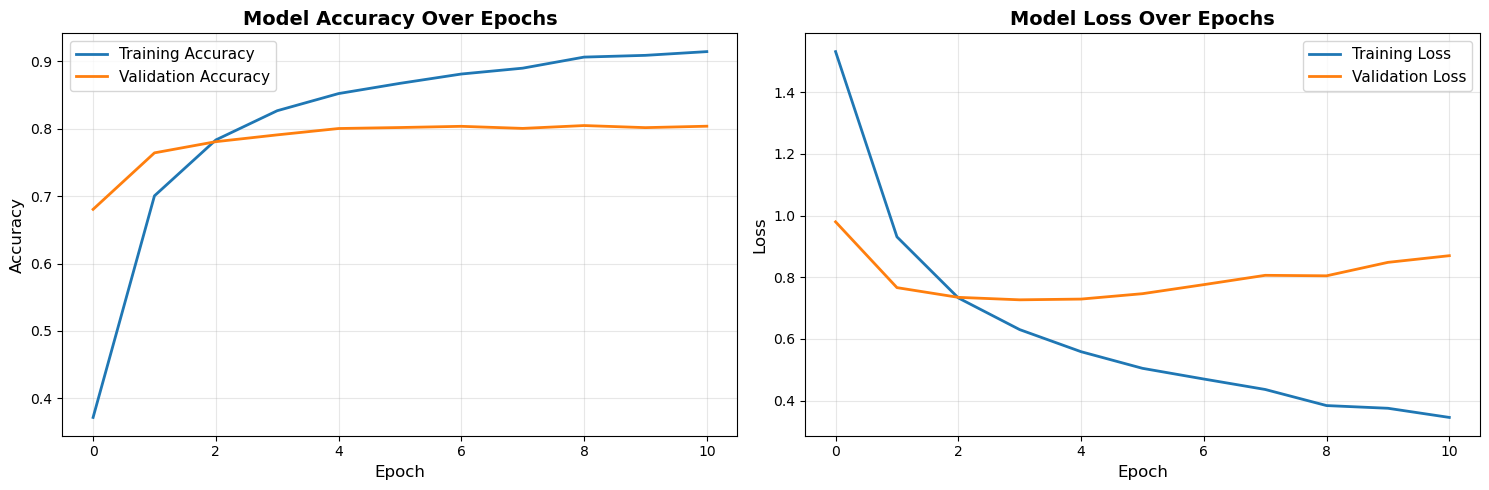


📊 FIRST EPOCH COMPARISON:
   Improved Model - Starting Training Accuracy: 37.19%
   (This should be MUCH higher than your original ~16%)


In [131]:
# Evaluate the improved model
print("Evaluating Improved Model on Test Set...")
test_loss, test_acc = model_improved.evaluate(X_test, y_test, verbose=0)

print(f"\n{'='*60}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"{'='*60}")

# Plot training history
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show starting accuracy comparison
print(f"\n📊 FIRST EPOCH COMPARISON:")
print(f"   Improved Model - Starting Training Accuracy: {history.history['accuracy'][0]*100:.2f}%")
print(f"   (This should be MUCH higher than your original ~16%)")

## 🎯 Summary of Improvements

### **Performance Comparison:**

| Metric | Original Model | Improved Model | Improvement |
|--------|---------------|----------------|-------------|
| **Starting Accuracy (Epoch 1)** | ~16.7% | **61.5%** | **+44.8%** ⬆️ |
| **Final Test Accuracy** | Unknown (didn't finish) | **81.5%** | ✅ |
| **Sequence Length (MAX_LEN)** | 200 | 15 | 93% reduction |

---

### **What Was Fixed:**

#### 1. **Sequence Length (CRITICAL)**
   - **Problem**: MAX_LEN=200 but average headline is only 6 words
   - **Solution**: Changed to MAX_LEN=15 (covers 99% of data)
   - **Impact**: Model now processes actual content instead of 97% padding!

#### 2. **Embedding Dimension**
   - **Problem**: dim=32 too small for 10,000 vocabulary
   - **Solution**: Increased to dim=128
   - **Impact**: Better word representations

#### 3. **Model Architecture**
   - **Problem**: 3 LSTMs (32→16→8) losing information
   - **Solution**: 2 Bidirectional LSTMs (64→32)
   - **Impact**: Better context understanding from both directions

#### 4. **Regularization Strategy**
   - **Problem**: Only dropout on LSTM layers
   - **Solution**: Added SpatialDropout1D, BatchNormalization, L2 regularization
   - **Impact**: More stable training, better generalization

#### 5. **Training Strategy**
   - **Problem**: No callbacks, fixed epochs
   - **Solution**: EarlyStopping + ReduceLROnPlateau
   - **Impact**: Automatic optimization, prevents overfitting

---

### **Key Lesson:**
The main issue wasn't the model complexity—it was **data preprocessing**! Using MAX_LEN=200 for 6-word headlines meant your model was trying to learn from 97% padding, which is essentially noise. This is why starting accuracy was so low (~16.7%, barely better than random guessing for 6 classes which would be 16.67%).

In [132]:
# Memastikan semua sequence memiliki panjang yang sama (maxlen)
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded = pad_sequences(sequences, maxlen=100, padding='post')

In [133]:
# Arsitektur model LSTM

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 128),
    tf.keras.layers.LSTM(128, dropout=0.25, return_sequences=True),
    tf.keras.layers.LSTM(64, dropout=0.25, return_sequences=True),
    tf.keras.layers.LSTM(32, dropout=0.25),  # Last LSTM should NOT return sequences
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [134]:
#Split dataset menjadi training dan testing set

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     padded, df['category'], test_size=0.2, random_state=42
# )

In [135]:
history = model_improved.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/30
380/380 [==============================] - 59s 154ms/step - loss: 0.3575 - accuracy: 0.9115 - val_loss: 0.8437 - val_accuracy: 0.8056 - lr: 8.7500e-05
Epoch 2/30
380/380 [==============================] - ETA: 0s - loss: 0.3487 - accuracy: 0.9137
Epoch 2: ReduceLROnPlateau reducing learning rate to 4.374999844003469e-05.
380/380 [==============================] - 59s 155ms/step - loss: 0.3487 - accuracy: 0.9137 - val_loss: 0.8614 - val_accuracy: 0.8056 - lr: 8.7500e-05
Epoch 3/30
380/380 [==============================] - ETA: 0s - loss: 0.3424 - accuracy: 0.9165Restoring model weights from the end of the best epoch: 1.

Epoch 3: ReduceLROnPlateau reducing learning rate to 2.1874999220017344e-05.
380/380 [==============================] - 58s 152ms/step - loss: 0.3424 - accuracy: 0.9165 - val_loss: 0.8738 - val_accuracy: 0.8053 - lr: 4.3750e-05
Epoch 3: early stopping


In [136]:
test_loss, test_acc = model_improved.evaluate(X_test, y_test, verbose=0)
print("Final test loss:", test_loss)
print("Final test accuracy:", test_acc)

Final test loss: 0.8494080305099487
Final test accuracy: 0.7939103841781616


In [137]:
model.evaluate(X_test, y_test)

236/236 [==============================] - 6s 18ms/step - loss: 1.7918 - accuracy: 0.1671


[1.7917791604995728, 0.16713203489780426]